#LeNet-5 Fashion-MNIST - Learning Rate example

In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
from keras.callbacks import LearningRateScheduler

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Normalizing to [0, 1]:

In [4]:
x_train, x_test = x_train/255.0, x_test/255.0

Transform labels to one-hot encoding:

In [5]:
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)

Assigning names to the labels:

In [6]:
labels = ["T_shirt","Trouser","Pullover","Dress","Coat",
          "Sandal","Shirt","Sneaker","Bag","Ankle_boot"]

Reshape the dataset into 4D dimension array:

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [8]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
model = tf.keras.models.Sequential([
                                    
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='sigmoid'),
   tf.keras.layers.BatchNormalization(axis=-1), 
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='sigmoid', padding='valid'),
   tf.keras.layers.BatchNormalization(axis=-1),
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   tf.keras.layers.Dense(120, activation='tanh'),
   tf.keras.layers.BatchNormalization(axis=-1),

   tf.keras.layers.Dense(84, activation='tanh'),

   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
   ])

In [11]:
n_epochs=3
n_batch=32

##**Caso-1: Learning Rate: Valor constante del learning_rate**

In [10]:
lr_inicial=0.01

In [18]:
opt1 = tf.keras.optimizers.SGD(lr=lr_inicial)

##**Caso-2: Learning Rate con decaimiento de acuerdo al total de epochs:**

###**lr=lro*(1/(1+decay * iterations))**

In [19]:
opt2 = tf.keras.optimizers.SGD(lr=lr_inicial, decay= lr_inicial/n_epochs )


##**Caso-3: Learning Rate with lr = lro * STEP_DECAY**

###Podemos definir que vaya disminuyendo cada 5 épocas de manera más drástica.


In [33]:
def step_decay(epoch):
  alfa_0 = 0.01
  factor = 2.718
  dropEvery = 5

  alfa = alfa_0 * (factor ** np.floor( (1+epoch)/dropEvery) )

  return float(alfa)

In [28]:
np.floor( (10)/5)

2.0

In [34]:
callbacks_list_stepd = [tf.keras.callbacks.LearningRateScheduler(step_decay)]

##**Caso-4: Learning Rate - Exponencial Decay - lr = lr0 * exp( - k * t )**

### O bien, que vaya disminuyendo de manera exponencial con respecto a las épocas.

In [113]:
def exp_decay(epoch):
  alfa_0 = 0.001
  factor = 0.001
  dropEvery = 5

  alfa = alfa_0 * np.exp( - factor * np.floor(epoch/dropEvery) )

  return float(alfa)

In [114]:
callbacks_list_expd = [tf.keras.callbacks.LearningRateScheduler(exp_decay)]

##**Caso-5: En cada caso podemos agregar momentum y nesterov**

In [38]:
opt5 = tf.keras.optimizers.SGD(lr=lr_inicial, momentum=0.9, nesterov=True)

In [30]:
model.compile(optimizer=opt1, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
H = model.fit(x_train, ytrain, 
              validation_data=(x_test,ytest),
              epochs=n_epochs, batch_size=n_batch, 
              callbacks=callbacks_list_stepd     # puedes usar solamente decaimiento constante o bien con callbacks.
              )   


Epoch 1/3
1875/1875 [==============================] - 39s 3ms/step - loss: 0.7119 - accuracy: 0.7596 - val_loss: 0.4010 - val_accuracy: 0.8624
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3839 - accuracy: 0.8631 - val_loss: 0.3510 - val_accuracy: 0.8762
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3303 - accuracy: 0.8819 - val_loss: 0.4065 - val_accuracy: 0.8541


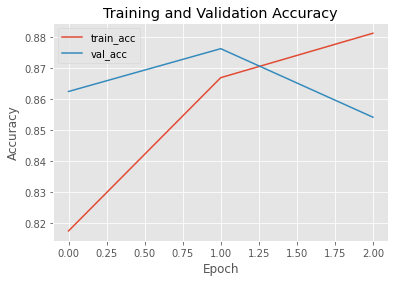

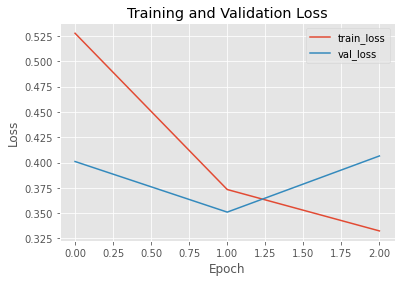

In [36]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [72]:
predictions = model.predict(x_test, batch_size=n_batch)

In [73]:
print(classification_report(ytest.argmax(axis=1), 
      predictions.argmax(axis=1),target_names=labels))

              precision    recall  f1-score   support

     T_shirt       0.83      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.84      0.84      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.82      0.85      0.83      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.74      0.68      0.70      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle_boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.89      0.90      0.89     10000
weighted avg       0.89      0.90      0.89     10000

